### PYTHON PROJECT ON CRASH DRIVING REPORT

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### ----> EDA (Exploratory Data Analysis) on this Dataset..

In [7]:
### Read the dataset Crash-Driving_Dataset
car_dt = pd.read_csv("Cleaned_Crash_Data.csv")
car_dt

<IPython.core.display.Javascript object>

C:\Users\admin\AppData\Local\Temp\ipykernel_20992\1085201484.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  car_dt = pd.read_csv("Cleaned_Crash_Data.csv")


,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Name,Off-Road Description,Municipality,...,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Location
0,DM8479000T,210020119,Takoma Park Police Depart,Property Damage Crash,2021-05-27 19:40:00,NaN,NaN,NaN,IN PARKING LOT,NaN,...,NaN,0,No,Yes,2017,HINO,TWK,38.987657,-76.987545,"(38.98765667, -76.987545)"
1,MCP2970000R,15045937,MONTGOMERY,Property Damage Crash,2015-09-11 13:29:00,NaN,NaN,NaN,Parking Lot: \n2525 Ennalls Ave,NaN,...,South,5,No,No,2012,TOYOTA,SU,39.039917,-77.053649,"(39.03991652, -77.05364898)"
2,MCP20160036,180040948,Montgomery County Police,Property Damage Crash,2018-08-17 14:25:00,NaN,NaN,NaN,PARKING LOT OF 16246 FREDERICK RD,NaN,...,West,15,No,No,2015,MAZD,TK,38.743373,-77.546997,"(38.743373, -77.54699707)"
3,EJ7879003C,230048975,Gaithersburg Police Depar,Injury Crash,2023-08-11 18:00:00,NaN,NaN,NaN,1 N SUMMIT DRIVE,NaN,...,Unknown,15,No,No,2018,RAM,TK,39.145873,-77.191940,"(39.14587303, -77.19194047)"
4,MCP2967004Y,230070277,Montgomery County Police,Property Damage Crash,2023-12-06 18:42:00,Maryland (State),CONNECTICUT AVE,BALTIMORE ST,NaN,KENSINGTON,...,South,35,No,No,2017,AUDI,A3,39.025170,-77.076333,"(39.02517017, -77.07633333)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194328,DD5567007L,250011663,ROCKVILLE,Injury Crash,2025-03-17 13:46:00,Other Public Roadway,W GUDE DR (EB/L),W GUDE DR (WB/L),NaN,NaN,...,Eastbound,35,No,No,2023,FORD,F-350,39.106702,-77.161268,"(39.10670229, -77.16126807)"
194329,MCP3218005S,250011908,MONTGOMERY,Property Damage Crash,2025-03-18 17:05:00,County Route,NaN,NaN,NaN,NaN,...,Eastbound,25,No,No,2021,MINI,HARDTOP,39.047028,-77.049309,"(39.04702835, -77.04930916)"
194330,MCP3040007M,250011985,MONTGOMERY,Property Damage Crash,2025-03-19 09:00:00,County Route,MACDUFF AVE,NaN,NaN,NaN,...,Westbound,35,No,No,2018,SUBARU,IMPREZA,39.141507,-77.084270,"(39.14150733, -77.0842695)"
194331,MCP3031006N,250010940,MONTGOMERY,Property Damage Crash,2025-03-12 19:30:00,County Route,PARRS RIDGE DR,NaN,NaN,NaN,...,Northbound,30,No,No,2024,HONDA,CR-V,39.122859,-76.985664,"(39.12285922, -76.98566391)"


In [4]:
### Handling the Missing Values in the dataset
car_dt = car_dt.dropna(thresh = len(car_dt) * 0.2, axis = 1)
car_dt.head(10)

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Name,Collision Type,Weather,...,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Location
0,DM8479000T,210020119,Takoma Park Police Depart,Property Damage Crash,05/27/2021 07:40:00 PM,NaN,NaN,NaN,OTHER,CLEAR,...,NaN,0,No,Yes,2017,HINO,TWK,38.987657,-76.987545,"(38.98765667, -76.987545)"
1,MCP2970000R,15045937,MONTGOMERY,Property Damage Crash,09/11/2015 01:29:00 PM,NaN,NaN,NaN,OTHER,CLEAR,...,South,5,No,No,2012,TOYOTA,SU,39.039917,-77.053649,"(39.03991652, -77.05364898)"
2,MCP20160036,180040948,Montgomery County Police,Property Damage Crash,08/17/2018 02:25:00 PM,NaN,NaN,NaN,OTHER,CLEAR,...,West,15,No,No,2015,MAZD,TK,38.743373,-77.546997,"(38.743373, -77.54699707)"
3,EJ7879003C,230048975,Gaithersburg Police Depar,Injury Crash,08/11/2023 06:00:00 PM,NaN,NaN,NaN,SINGLE VEHICLE,CLEAR,...,Unknown,15,No,No,2018,RAM,TK,39.145873,-77.191940,"(39.14587303, -77.19194047)"
4,MCP2967004Y,230070277,Montgomery County Police,Property Damage Crash,12/06/2023 06:42:00 PM,Maryland (State),CONNECTICUT AVE,BALTIMORE ST,STRAIGHT MOVEMENT ANGLE,CLEAR,...,South,35,No,No,2017,AUDI,A3,39.025170,-77.076333,"(39.02517017, -77.07633333)"
5,MCP3348000Z,230051804,Montgomery County Police,Injury Crash,08/28/2023 11:09:00 AM,Maryland (State),NORBECK RD,DRURY RD,SAME DIR REAR END,CLOUDY,...,East,30,No,No,2010,MERCEDES,ML360,39.116462,-77.050530,"(39.11646167, -77.05053)"
6,MCP302600BD,230046425,Montgomery County Police,Property Damage Crash,07/27/2023 12:30:00 PM,County,GREENTREE RD,OLD GEORGETOWN RD,STRAIGHT MOVEMENT ANGLE,CLEAR,...,East,30,No,No,2022,HOND,PILOT,39.000144,-77.109881,"(39.00014446, -77.10988077)"
7,MCP2583003S,230074198,Montgomery County Police,Injury Crash,12/29/2023 04:40:00 PM,County,ELMER SCHOOL RD,CLUB HOLLOW RD,SINGLE VEHICLE,CLOUDY,...,West,30,No,No,2005,FORD,EXPLORER,39.140092,-77.484022,"(39.14009241, -77.48402152)"
8,MCP3372001V,230065250,Montgomery County Police,Property Damage Crash,11/10/2023 08:24:00 PM,Maryland (State),GEORGIA AVE,MAY ST,SAME DIR REAR END,CLEAR,...,South,35,No,No,2016,TOYOTA,CAMRY,39.072460,-77.064860,"(39.0724598, -77.06486034)"
9,MCP3005007M,230060937,Montgomery County Police,Property Damage Crash,10/16/2023 07:33:00 PM,Maryland (State),GEORGIA AVE,LINDELL ST,HEAD ON LEFT TURN,CLEAR,...,South,35,No,No,2021,HONDA,ACCORD,39.054407,-77.050488,"(39.05440667, -77.05048833)"


In [21]:
### Fill missing values with mode (for categorical) and median (for numeric)
# Separate numerical and categorical columns
numerical_cols = car_dt.select_dtypes(include=["number"]).columns
categorical_cols = car_dt.select_dtypes(include=["object"]).columns
# Fill missing values
car_dt[numerical_cols] = car_dt[numerical_cols].apply(lambda x: x.fillna(x.median()))  # Median for numerical
car_dt[categorical_cols] = car_dt[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))  # Mode for categorical
car_dt

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Name,Collision Type,Weather,...,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Location
0,DM8479000T,210020119,Takoma Park Police Depart,Property Damage Crash,05/27/2021 07:40:00 PM,Maryland (State),GEORGIA AVE,GEORGIA AVE,OTHER,CLEAR,...,North,0,No,Yes,2017,HINO,TWK,38.987657,-76.987545,"(38.98765667, -76.987545)"
1,MCP2970000R,15045937,MONTGOMERY,Property Damage Crash,09/11/2015 01:29:00 PM,Maryland (State),GEORGIA AVE,GEORGIA AVE,OTHER,CLEAR,...,South,5,No,No,2012,TOYOTA,SU,39.039917,-77.053649,"(39.03991652, -77.05364898)"
2,MCP20160036,180040948,Montgomery County Police,Property Damage Crash,08/17/2018 02:25:00 PM,Maryland (State),GEORGIA AVE,GEORGIA AVE,OTHER,CLEAR,...,West,15,No,No,2015,MAZD,TK,38.743373,-77.546997,"(38.743373, -77.54699707)"
3,EJ7879003C,230048975,Gaithersburg Police Depar,Injury Crash,08/11/2023 06:00:00 PM,Maryland (State),GEORGIA AVE,GEORGIA AVE,SINGLE VEHICLE,CLEAR,...,Unknown,15,No,No,2018,RAM,TK,39.145873,-77.191940,"(39.14587303, -77.19194047)"
4,MCP2967004Y,230070277,Montgomery County Police,Property Damage Crash,12/06/2023 06:42:00 PM,Maryland (State),CONNECTICUT AVE,BALTIMORE ST,STRAIGHT MOVEMENT ANGLE,CLEAR,...,South,35,No,No,2017,AUDI,A3,39.025170,-77.076333,"(39.02517017, -77.07633333)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194328,DD5567007L,250011663,ROCKVILLE,Injury Crash,03/17/2025 01:46:00 PM,Other Public Roadway,W GUDE DR (EB/L),W GUDE DR (WB/L),Angle,Clear,...,Eastbound,35,No,No,2023,FORD,F-350,39.106702,-77.161268,"(39.10670229, -77.16126807)"
194329,MCP3218005S,250011908,MONTGOMERY,Property Damage Crash,03/18/2025 05:05:00 PM,County Route,GEORGIA AVE,GEORGIA AVE,Angle,Clear,...,Eastbound,25,No,No,2021,MINI,HARDTOP,39.047028,-77.049309,"(39.04702835, -77.04930916)"
194330,MCP3040007M,250011985,MONTGOMERY,Property Damage Crash,03/19/2025 09:00:00 AM,County Route,MACDUFF AVE,GEORGIA AVE,Front to Rear,Clear,...,Westbound,35,No,No,2018,SUBARU,IMPREZA,39.141507,-77.084270,"(39.14150733, -77.0842695)"
194331,MCP3031006N,250010940,MONTGOMERY,Property Damage Crash,03/12/2025 07:30:00 PM,County Route,PARRS RIDGE DR,GEORGIA AVE,Front to Front,Clear,...,Northbound,30,No,No,2024,HONDA,CR-V,39.122859,-76.985664,"(39.12285922, -76.98566391)"


In [5]:
# Remove unrealistic vehicle years (valid range: 1900-2025)
car_dt["Vehicle Year"] = car_dt["Vehicle Year"].apply(lambda x: x if 1900 <= x <= 2025 else None)

# Ensure speed limits are within a valid range (0-75 mph)
car_dt = car_dt[(car_dt["Speed Limit"] > 0) & (car_dt["Speed Limit"] <= 75)]
car_dt

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Name,Collision Type,Weather,...,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Location
1,MCP2970000R,15045937,MONTGOMERY,Property Damage Crash,09/11/2015 01:29:00 PM,NaN,NaN,NaN,OTHER,CLEAR,...,South,5,No,No,2012.0,TOYOTA,SU,39.039917,-77.053649,"(39.03991652, -77.05364898)"
2,MCP20160036,180040948,Montgomery County Police,Property Damage Crash,08/17/2018 02:25:00 PM,NaN,NaN,NaN,OTHER,CLEAR,...,West,15,No,No,2015.0,MAZD,TK,38.743373,-77.546997,"(38.743373, -77.54699707)"
3,EJ7879003C,230048975,Gaithersburg Police Depar,Injury Crash,08/11/2023 06:00:00 PM,NaN,NaN,NaN,SINGLE VEHICLE,CLEAR,...,Unknown,15,No,No,2018.0,RAM,TK,39.145873,-77.191940,"(39.14587303, -77.19194047)"
4,MCP2967004Y,230070277,Montgomery County Police,Property Damage Crash,12/06/2023 06:42:00 PM,Maryland (State),CONNECTICUT AVE,BALTIMORE ST,STRAIGHT MOVEMENT ANGLE,CLEAR,...,South,35,No,No,2017.0,AUDI,A3,39.025170,-77.076333,"(39.02517017, -77.07633333)"
5,MCP3348000Z,230051804,Montgomery County Police,Injury Crash,08/28/2023 11:09:00 AM,Maryland (State),NORBECK RD,DRURY RD,SAME DIR REAR END,CLOUDY,...,East,30,No,No,2010.0,MERCEDES,ML360,39.116462,-77.050530,"(39.11646167, -77.05053)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194328,DD5567007L,250011663,ROCKVILLE,Injury Crash,03/17/2025 01:46:00 PM,Other Public Roadway,W GUDE DR (EB/L),W GUDE DR (WB/L),Angle,Clear,...,Eastbound,35,No,No,2023.0,FORD,F-350,39.106702,-77.161268,"(39.10670229, -77.16126807)"
194329,MCP3218005S,250011908,MONTGOMERY,Property Damage Crash,03/18/2025 05:05:00 PM,County Route,NaN,NaN,Angle,Clear,...,Eastbound,25,No,No,2021.0,MINI,HARDTOP,39.047028,-77.049309,"(39.04702835, -77.04930916)"
194330,MCP3040007M,250011985,MONTGOMERY,Property Damage Crash,03/19/2025 09:00:00 AM,County Route,MACDUFF AVE,NaN,Front to Rear,Clear,...,Westbound,35,No,No,2018.0,SUBARU,IMPREZA,39.141507,-77.084270,"(39.14150733, -77.0842695)"
194331,MCP3031006N,250010940,MONTGOMERY,Property Damage Crash,03/12/2025 07:30:00 PM,County Route,PARRS RIDGE DR,NaN,Front to Front,Clear,...,Northbound,30,No,No,2024.0,HONDA,CR-V,39.122859,-76.985664,"(39.12285922, -76.98566391)"


In [6]:
# Convert date column to datetime format
# Convert "Crash Date/Time" to datetime with a specific format
car_dt["Crash Date/Time"] = pd.to_datetime(car_dt["Crash Date/Time"], format="%m/%d/%Y %H:%M", errors="coerce")
car_dt

<IPython.core.display.Javascript object>

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Name,Off-Road Description,Municipality,...,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Location
0,DM8479000T,210020119,Takoma Park Police Depart,Property Damage Crash,2021-05-27 19:40:00,NaN,NaN,NaN,IN PARKING LOT,NaN,...,NaN,0,No,Yes,2017,HINO,TWK,38.987657,-76.987545,"(38.98765667, -76.987545)"
1,MCP2970000R,15045937,MONTGOMERY,Property Damage Crash,2015-09-11 13:29:00,NaN,NaN,NaN,Parking Lot: \n2525 Ennalls Ave,NaN,...,South,5,No,No,2012,TOYOTA,SU,39.039917,-77.053649,"(39.03991652, -77.05364898)"
2,MCP20160036,180040948,Montgomery County Police,Property Damage Crash,2018-08-17 14:25:00,NaN,NaN,NaN,PARKING LOT OF 16246 FREDERICK RD,NaN,...,West,15,No,No,2015,MAZD,TK,38.743373,-77.546997,"(38.743373, -77.54699707)"
3,EJ7879003C,230048975,Gaithersburg Police Depar,Injury Crash,2023-08-11 18:00:00,NaN,NaN,NaN,1 N SUMMIT DRIVE,NaN,...,Unknown,15,No,No,2018,RAM,TK,39.145873,-77.191940,"(39.14587303, -77.19194047)"
4,MCP2967004Y,230070277,Montgomery County Police,Property Damage Crash,2023-12-06 18:42:00,Maryland (State),CONNECTICUT AVE,BALTIMORE ST,NaN,KENSINGTON,...,South,35,No,No,2017,AUDI,A3,39.025170,-77.076333,"(39.02517017, -77.07633333)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194328,DD5567007L,250011663,ROCKVILLE,Injury Crash,2025-03-17 13:46:00,Other Public Roadway,W GUDE DR (EB/L),W GUDE DR (WB/L),NaN,NaN,...,Eastbound,35,No,No,2023,FORD,F-350,39.106702,-77.161268,"(39.10670229, -77.16126807)"
194329,MCP3218005S,250011908,MONTGOMERY,Property Damage Crash,2025-03-18 17:05:00,County Route,NaN,NaN,NaN,NaN,...,Eastbound,25,No,No,2021,MINI,HARDTOP,39.047028,-77.049309,"(39.04702835, -77.04930916)"
194330,MCP3040007M,250011985,MONTGOMERY,Property Damage Crash,2025-03-19 09:00:00,County Route,MACDUFF AVE,NaN,NaN,NaN,...,Westbound,35,No,No,2018,SUBARU,IMPREZA,39.141507,-77.084270,"(39.14150733, -77.0842695)"
194331,MCP3031006N,250010940,MONTGOMERY,Property Damage Crash,2025-03-12 19:30:00,County Route,PARRS RIDGE DR,NaN,NaN,NaN,...,Northbound,30,No,No,2024,HONDA,CR-V,39.122859,-76.985664,"(39.12285922, -76.98566391)"


In [8]:
car_dt.drop_duplicates(inplace=True)
car_dt

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Name,Off-Road Description,Municipality,...,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Location
0,DM8479000T,210020119,Takoma Park Police Depart,Property Damage Crash,2021-05-27 19:40:00,NaN,NaN,NaN,IN PARKING LOT,NaN,...,NaN,0,No,Yes,2017,HINO,TWK,38.987657,-76.987545,"(38.98765667, -76.987545)"
1,MCP2970000R,15045937,MONTGOMERY,Property Damage Crash,2015-09-11 13:29:00,NaN,NaN,NaN,Parking Lot: \n2525 Ennalls Ave,NaN,...,South,5,No,No,2012,TOYOTA,SU,39.039917,-77.053649,"(39.03991652, -77.05364898)"
2,MCP20160036,180040948,Montgomery County Police,Property Damage Crash,2018-08-17 14:25:00,NaN,NaN,NaN,PARKING LOT OF 16246 FREDERICK RD,NaN,...,West,15,No,No,2015,MAZD,TK,38.743373,-77.546997,"(38.743373, -77.54699707)"
3,EJ7879003C,230048975,Gaithersburg Police Depar,Injury Crash,2023-08-11 18:00:00,NaN,NaN,NaN,1 N SUMMIT DRIVE,NaN,...,Unknown,15,No,No,2018,RAM,TK,39.145873,-77.191940,"(39.14587303, -77.19194047)"
4,MCP2967004Y,230070277,Montgomery County Police,Property Damage Crash,2023-12-06 18:42:00,Maryland (State),CONNECTICUT AVE,BALTIMORE ST,NaN,KENSINGTON,...,South,35,No,No,2017,AUDI,A3,39.025170,-77.076333,"(39.02517017, -77.07633333)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194328,DD5567007L,250011663,ROCKVILLE,Injury Crash,2025-03-17 13:46:00,Other Public Roadway,W GUDE DR (EB/L),W GUDE DR (WB/L),NaN,NaN,...,Eastbound,35,No,No,2023,FORD,F-350,39.106702,-77.161268,"(39.10670229, -77.16126807)"
194329,MCP3218005S,250011908,MONTGOMERY,Property Damage Crash,2025-03-18 17:05:00,County Route,NaN,NaN,NaN,NaN,...,Eastbound,25,No,No,2021,MINI,HARDTOP,39.047028,-77.049309,"(39.04702835, -77.04930916)"
194330,MCP3040007M,250011985,MONTGOMERY,Property Damage Crash,2025-03-19 09:00:00,County Route,MACDUFF AVE,NaN,NaN,NaN,...,Westbound,35,No,No,2018,SUBARU,IMPREZA,39.141507,-77.084270,"(39.14150733, -77.0842695)"
194331,MCP3031006N,250010940,MONTGOMERY,Property Damage Crash,2025-03-12 19:30:00,County Route,PARRS RIDGE DR,NaN,NaN,NaN,...,Northbound,30,No,No,2024,HONDA,CR-V,39.122859,-76.985664,"(39.12285922, -76.98566391)"


In [10]:
car_dt.to_csv("Cleaned_Crash_Data.csv", index=False)
print("Data cleaning complete. File saved as 'Cleaned_Crash_Data.csv'.")
car_dt

Data cleaning complete. File saved as 'Cleaned_Crash_Data.csv'.


,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Name,Off-Road Description,Municipality,...,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Location
0,DM8479000T,210020119,Takoma Park Police Depart,Property Damage Crash,2021-05-27 19:40:00,NaN,NaN,NaN,IN PARKING LOT,NaN,...,NaN,0,No,Yes,2017,HINO,TWK,38.987657,-76.987545,"(38.98765667, -76.987545)"
1,MCP2970000R,15045937,MONTGOMERY,Property Damage Crash,2015-09-11 13:29:00,NaN,NaN,NaN,Parking Lot: \n2525 Ennalls Ave,NaN,...,South,5,No,No,2012,TOYOTA,SU,39.039917,-77.053649,"(39.03991652, -77.05364898)"
2,MCP20160036,180040948,Montgomery County Police,Property Damage Crash,2018-08-17 14:25:00,NaN,NaN,NaN,PARKING LOT OF 16246 FREDERICK RD,NaN,...,West,15,No,No,2015,MAZD,TK,38.743373,-77.546997,"(38.743373, -77.54699707)"
3,EJ7879003C,230048975,Gaithersburg Police Depar,Injury Crash,2023-08-11 18:00:00,NaN,NaN,NaN,1 N SUMMIT DRIVE,NaN,...,Unknown,15,No,No,2018,RAM,TK,39.145873,-77.191940,"(39.14587303, -77.19194047)"
4,MCP2967004Y,230070277,Montgomery County Police,Property Damage Crash,2023-12-06 18:42:00,Maryland (State),CONNECTICUT AVE,BALTIMORE ST,NaN,KENSINGTON,...,South,35,No,No,2017,AUDI,A3,39.025170,-77.076333,"(39.02517017, -77.07633333)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194328,DD5567007L,250011663,ROCKVILLE,Injury Crash,2025-03-17 13:46:00,Other Public Roadway,W GUDE DR (EB/L),W GUDE DR (WB/L),NaN,NaN,...,Eastbound,35,No,No,2023,FORD,F-350,39.106702,-77.161268,"(39.10670229, -77.16126807)"
194329,MCP3218005S,250011908,MONTGOMERY,Property Damage Crash,2025-03-18 17:05:00,County Route,NaN,NaN,NaN,NaN,...,Eastbound,25,No,No,2021,MINI,HARDTOP,39.047028,-77.049309,"(39.04702835, -77.04930916)"
194330,MCP3040007M,250011985,MONTGOMERY,Property Damage Crash,2025-03-19 09:00:00,County Route,MACDUFF AVE,NaN,NaN,NaN,...,Westbound,35,No,No,2018,SUBARU,IMPREZA,39.141507,-77.084270,"(39.14150733, -77.0842695)"
194331,MCP3031006N,250010940,MONTGOMERY,Property Damage Crash,2025-03-12 19:30:00,County Route,PARRS RIDGE DR,NaN,NaN,NaN,...,Northbound,30,No,No,2024,HONDA,CR-V,39.122859,-76.985664,"(39.12285922, -76.98566391)"


#### ----> VISUALIZATIONS...

#### +++++> Correlation Heatmap Matrix

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

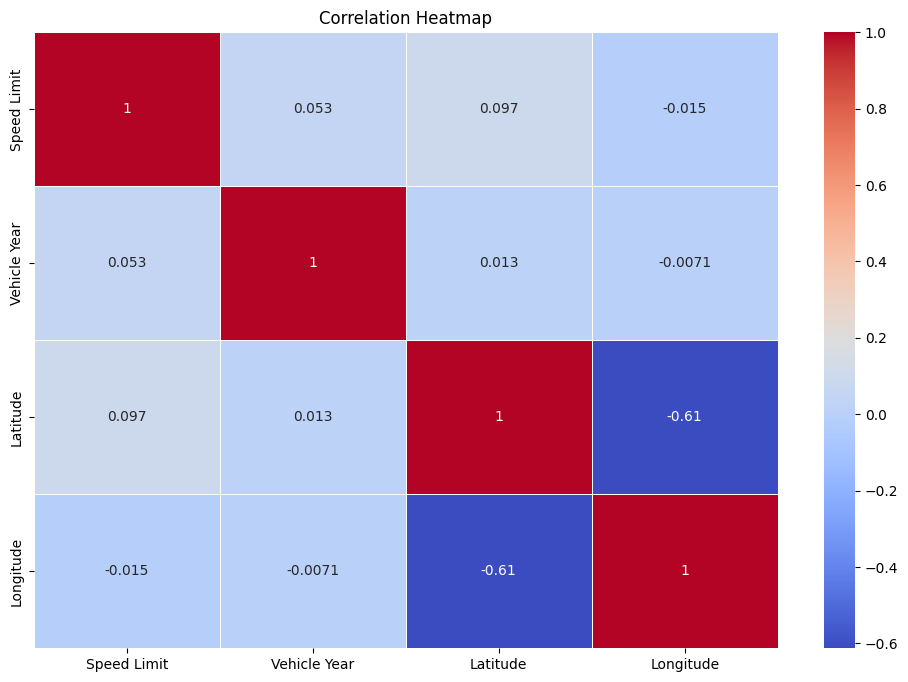

In [16]:
### A heatmap of correaltion is typically used to identify patterns and relationship and potensial pattern redundancy among numeric feature..
plt.figure(figsize = (12,8))
sns.heatmap(car_dt.corr(numeric_only = True), annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title("Correlation Heatmap")
plt.show()

#### With this heatmap we can clearly analyse the relationship between all the numeric columns with each other..

#### +++++> COUNTPLOT

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

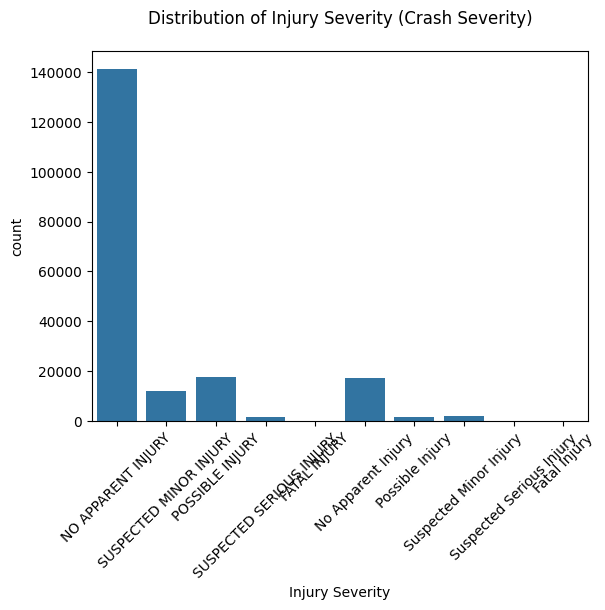

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [15]:
sns.countplot(x='Injury Severity', data=car_dt)
plt.title('Distribution of Injury Severity (Crash Severity)', pad = 20, fontsize = 12)
plt.xticks(rotation=45)
plt.show()
plt.tight_layout()

#### With this countplot wil'be able to see that the severity of the injury caused by the accident as per the no. of accident.

#### +++++> HISTOGRAMS 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

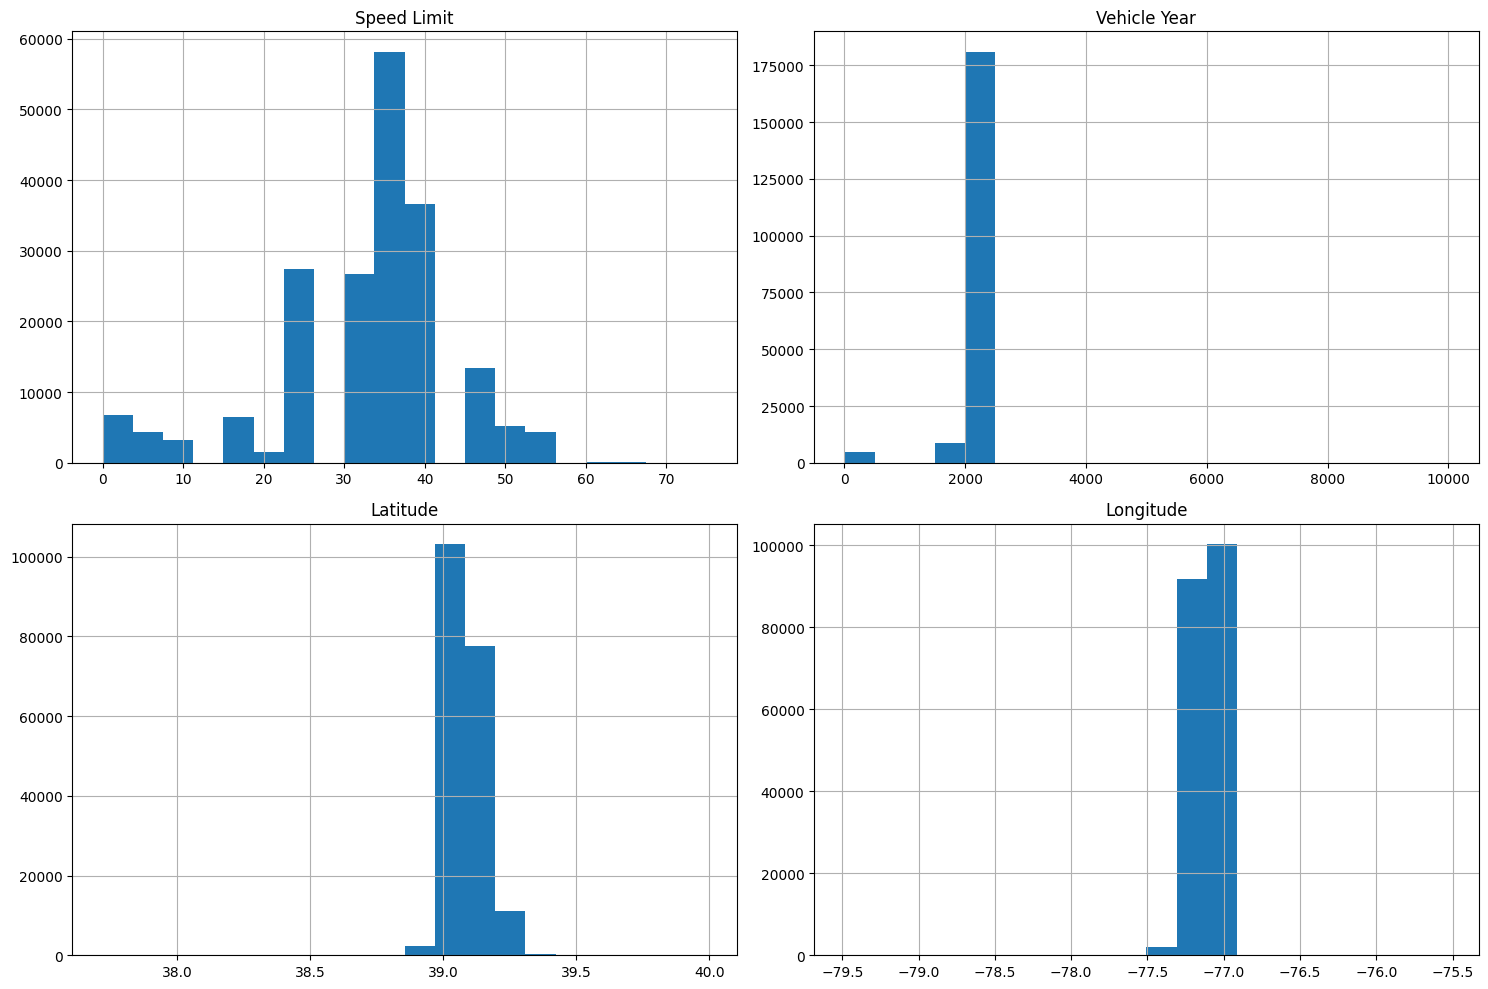

In [14]:
car_dt.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

#### With these plots we can clearly analyse that how all numerical features are distributed .

#### +++++> BOXPLOT

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

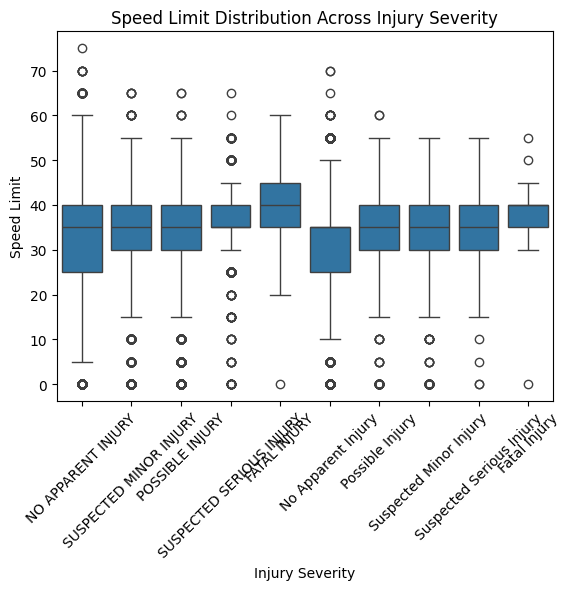

In [13]:
# Clean column names
car_dt.columns = car_dt.columns.str.strip()

# Create the boxplot
sns.boxplot(x='Injury Severity', y='Speed Limit', data=car_dt)
plt.title('Speed Limit Distribution Across Injury Severity')
plt.xticks(rotation=45)
plt.show()

#### With these box and whiskers plot we can analyse how speedlimit distributes across injury severity.

#### +++++> BARPLOT

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

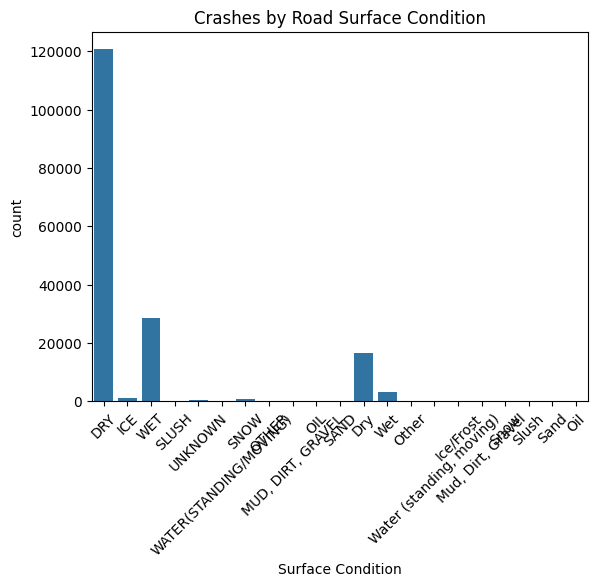

In [12]:
sns.countplot(x='Surface Condition', data=car_dt)
plt.title('Crashes by Road Surface Condition')
plt.xticks(rotation=45)
plt.show()

#### With this we can clearly analyse how crashes occured based on the weather condition..

#### +++++> PAIRPLOT

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

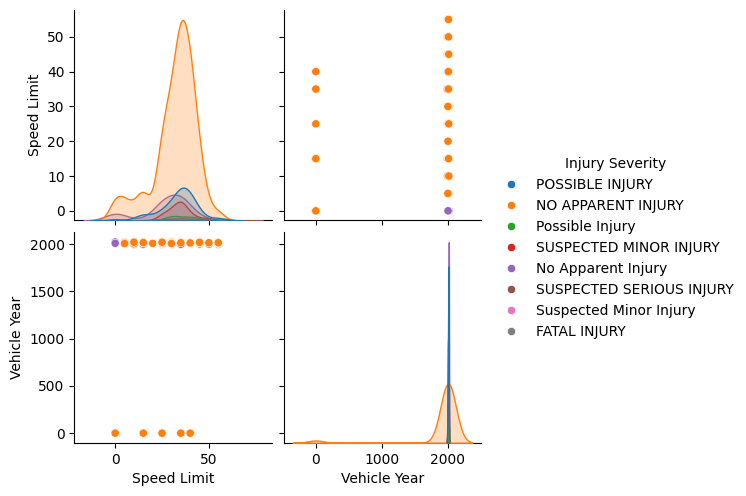

In [11]:
sample_df = car_dt[['Speed Limit', 'Vehicle Year', 'Injury Severity']].dropna().sample(n=500)  # sample to avoid slow plots
sns.pairplot(sample_df, hue='Injury Severity')
plt.show()

#### With this we can analyse how injury severity varies with other parameters

#### +++++> Time-Series Trend

<IPython.core.display.Javascript object>

C:\Users\admin\AppData\Local\Temp\ipykernel_12732\1526081581.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_car_dt['Crash Date'] = filtered_car_dt['Crash Date/Time'].dt.date


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

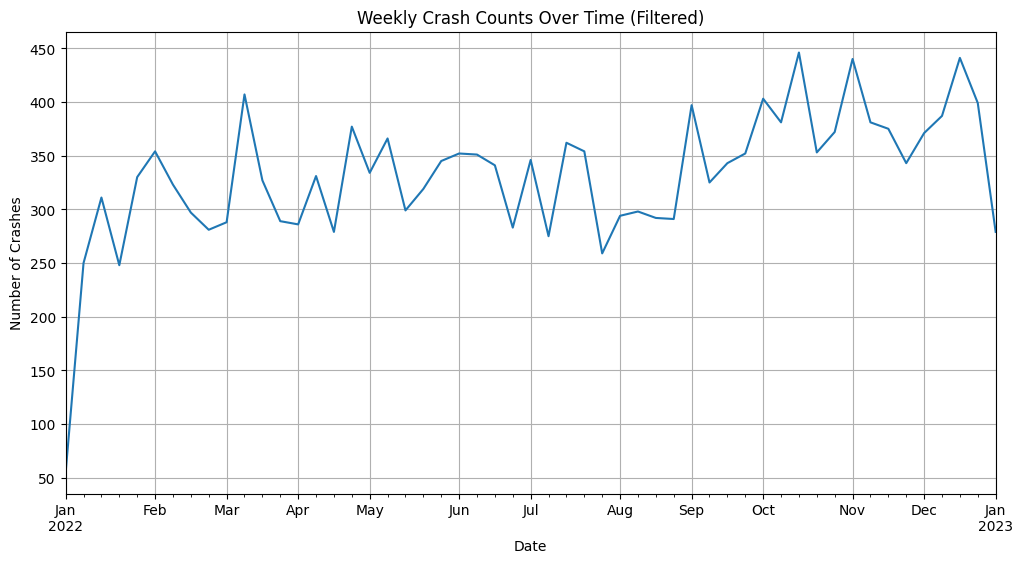

In [5]:
car_dt['Crash Date/Time'] = pd.to_datetime(car_dt['Crash Date/Time'], errors='coerce')
# Filter for a specific date range
start_date = '2022-01-01'
end_date = '2023-01-01'
filtered_car_dt = car_dt[(car_dt['Crash Date/Time'] >= start_date) & (car_dt['Crash Date/Time'] <= end_date)]

# Extract Crash Date and calculate daily counts
filtered_car_dt['Crash Date'] = filtered_car_dt['Crash Date/Time'].dt.date
daily_crashes = filtered_car_dt.groupby('Crash Date').size()

# Resample data to weekly for smoother trends
daily_crashes.index = pd.to_datetime(daily_crashes.index)
weekly_crashes = daily_crashes.resample('W').sum()

# Plot the data
plt.figure(figsize=(12, 6))
weekly_crashes.plot()
plt.title('Weekly Crash Counts Over Time (Filtered)')
plt.xlabel('Date')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()
